In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
from scipy.spatial import ConvexHull

def printCovexHull(a, b):
    plt.figure(figsize = (10, 6))
    colors = ['b','r','g']
    plt.title(f"{data.feature_names[a].capitalize()} vs {data.feature_names[b].capitalize()}")
    plt.xlabel(data.feature_names[a])
    plt.ylabel(data.feature_names[b])
    for i in range(len(data.target_names)):
        bucket = df[df['Target'] == i]
        bucket = bucket.iloc[:,[a, b]].values
        hull = ConvexHull(bucket) 
        plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
        for simplex in hull.simplices:
            plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    plt.legend()
    plt.show()

In [3]:
from myConvexHull.quickhull import KonvexHull

def printMyCovexHull(a, b):
    plt.figure(figsize = (10, 6))
    colors = ['b','r','g']
    plt.title(f"{data.feature_names[a].capitalize()} vs {data.feature_names[b].capitalize()}")
    plt.xlabel(data.feature_names[a])
    plt.ylabel(data.feature_names[b])
    for i in range(len(data.target_names)):
        bucket = df[df['Target'] == i]
        bucket = bucket.iloc[:,[a, b]].values
        hull = KonvexHull(bucket)
        hull.fit()
        plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
        for simplex in hull.simplices:
            plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    plt.legend()
    plt.show()

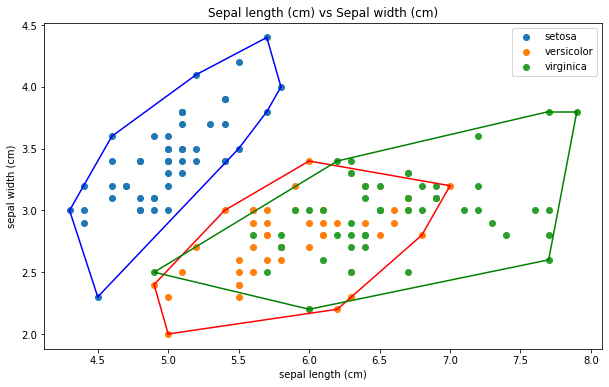

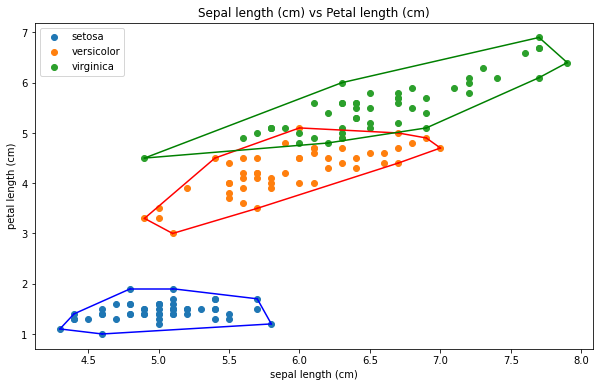

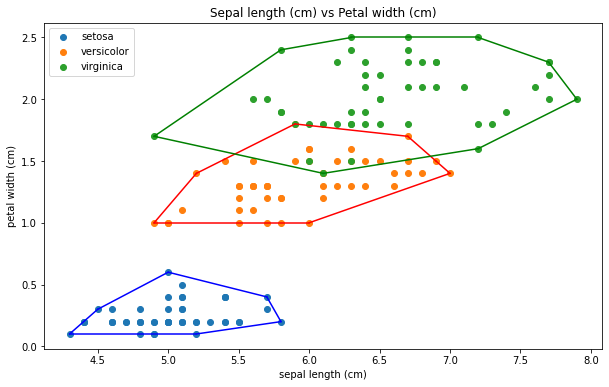

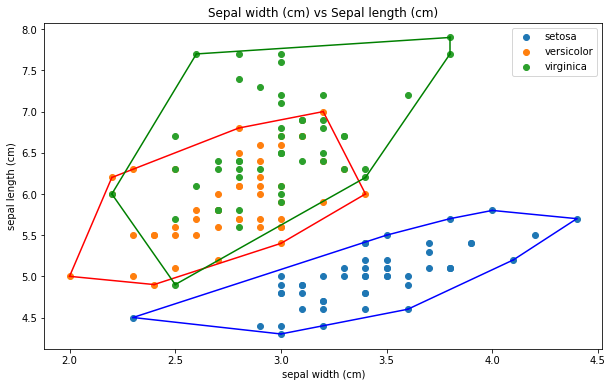

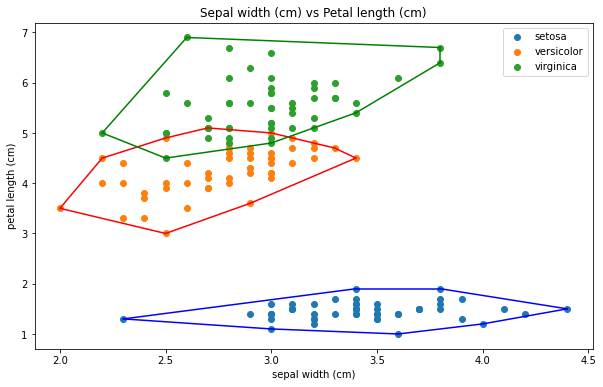

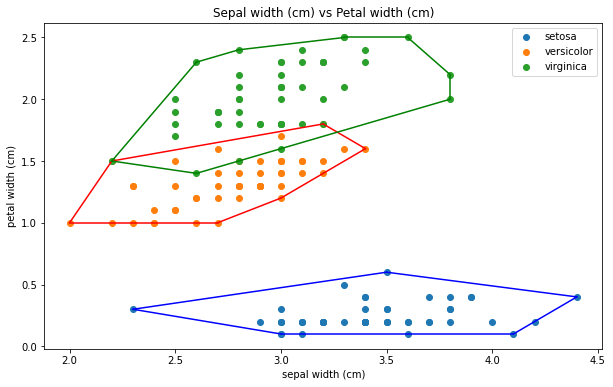

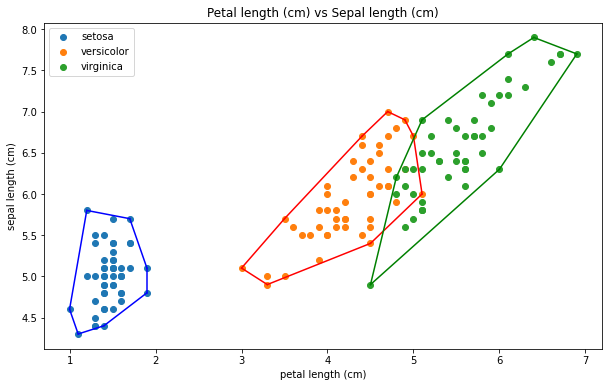

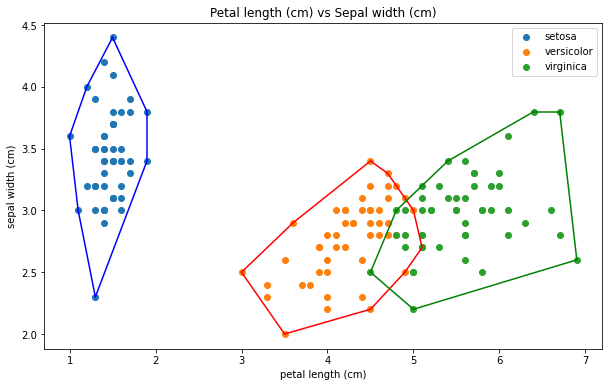

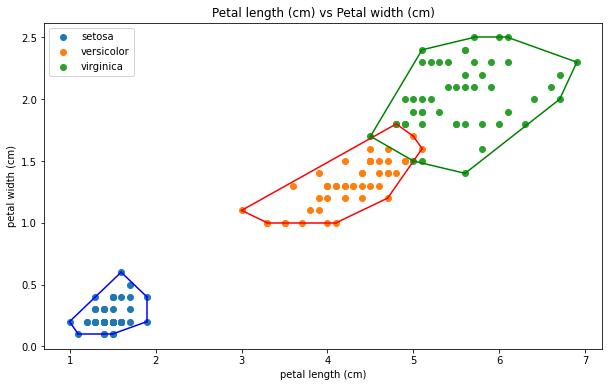

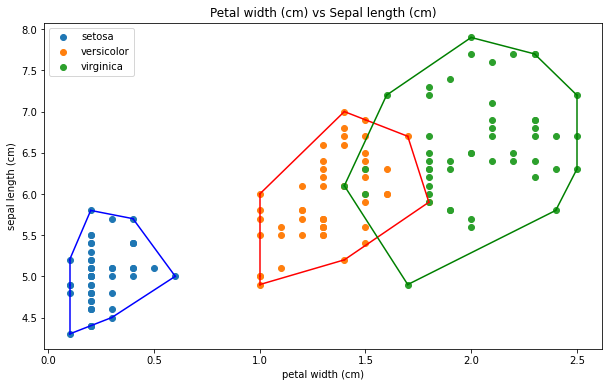

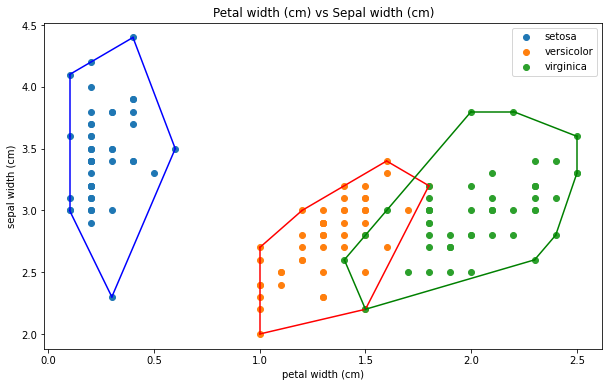

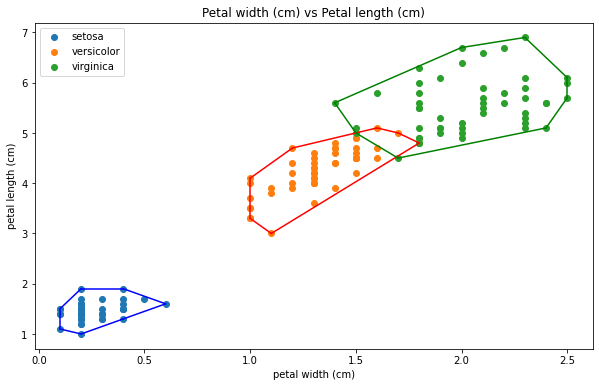

In [4]:
from itertools import permutations

def generateAllCombinations(num_of_features):
    combinations = list(permutations(range(num_of_features), 2))
    for c in combinations:
        printMyCovexHull(c[0], c[1])

generateAllCombinations(4)